# 11.3. Decisions and Uncertainty

- The statistical and computational methodology that we developed for assessing models about jury selection fit into a general framework of decision making called **statistical tests of hypotheses**.


## 11.3.1. Mendel’s Model

- Color (“purple, white”) distribution is [0.75, 0.25].- For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

- To see whether his model was valid, Mendel grew 929 pea plants of this variety. **Among these 929 plants, 705 had purple flowers**. (705/929 == 0.758880517)

## 11.3.2. Step 1: The Hypotheses

- The **null hypothesis**: a hypothesis under which you can simulate data. This is a clearly defined model about **chances**. It says that **the data were generated at random under clearly specified assumptions** about the **randomness**. The word “null” reinforces the idea that if the data look different from what the null hypothesis predicts, the difference is due to nothing but chance.
- The **alternative hypothesis**: some reason **other than chance** made the data differ from the predictions of the model in the null hypothesis
- The **null hypothesis**: the **null hypothesis is a hypothesis under which you can simulate data**


## 11.3.3. Step 2: The Test Statistic

- **Test statistic**: In order to decide between the two hypothesis, we must choose a statistic that we can use to make the decision. This is called the test statistic.
- TVD

| 0.7 - 0.75 | = 0.05 = | 0.3 - 0.25 |

So the TVD is

1/2 (|0.7 - 0.75| + | 0.3 - 0.25 |) = 0.05 = |0.7 - 0.75|

| sample percent of purple-flowering plants - 75 |


### 11.3.3.1. Observed Value of the Test Statistic

In [11]:
observed_statistic = abs (100 * (705/929) - 75)
observed_statistic

### note that this is percentage

0.8880516684607045

## 11.3.4. Step 3: The Distribution of the Test Statistic, Under the Null Hypothesis

In [2]:
from datascience import *
import numpy as np

mendel_proportions = make_array(0.75, 0.25)
mendel_proportions_purple = mendel_proportions.item(0)   ### this is 75 percent
mendel_proportions_purple

0.75

In [32]:
sample_proportions(929, mendel_proportions)          ### an array
sample_proportions(929, mendel_proportions).item(0)

0.7448869752421959

In [30]:
def one_simulated_distance():
    sample_proportions_purple = sample_proportions(929, mendel_proportions).item(0)  ### random
    return 100 * abs(sample_proportions_purple - mendel_proportions_purple)  
    ### percentage; in jury selection 2, we use the ...

In [23]:
import numpy as np

repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    # distances = np.append(distances, one_simulated_distance)
    distances = np.append(distances, one_simulated_distance())

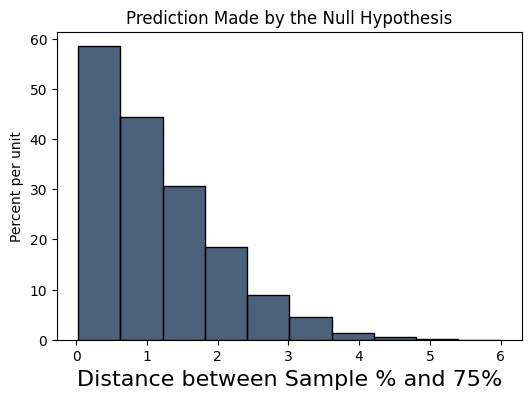

In [24]:
import matplotlib.pyplot as plots
%matplotlib inline

Table().with_column(
    'Distance between Sample % and 75%', distances).hist()

plots.title('Prediction Made by the Null Hypothesis');


## 11.3.5. Step 4. The Conclusion of the Test

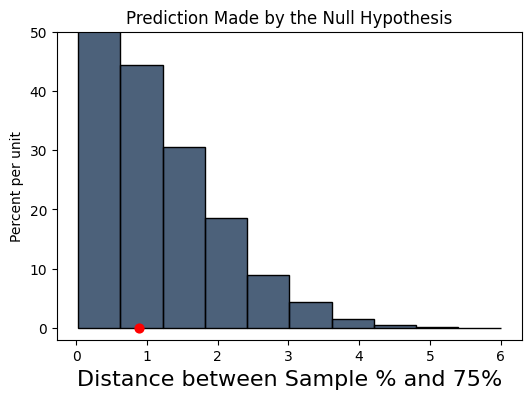

In [25]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=40);

##### guess what, it looks like the dot is part of the histogram

The observed statistic is like a typical distance predicted by the null hypothesis. The null hypothesis is Mendel’s model. So our test concludes that the data are consistent with Mendel’s model.

Based on our data, Mendel’s model looks good.



## 11.3.6. The Meaning of “Consistent”

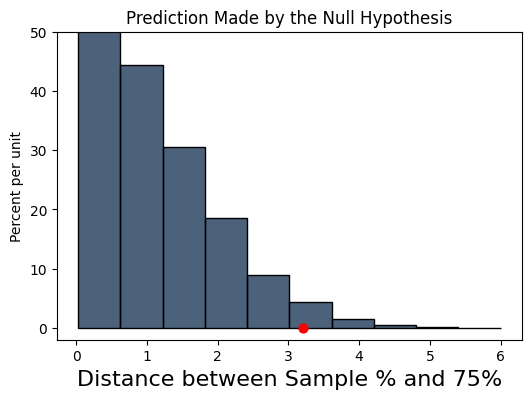

In [26]:
### what if we have an observed_statistic of 3.2???

different_observed_statistic = 3.2
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(different_observed_statistic, 0, color='red', s=40);

- Is the observation based on the new variety of plants consistent with the predictions in the histogram, or not?
- Now the answer is not so clear. It depends on whether you think the red dot is too far from the bulk of the predicted values to be consistent with the prediction based on Mendel’s model.

## 11.3.7. Conventional Cut-offs and the P-value

- The conventions are based on the area in the tail, starting at the observed statistic (the red dot) and looking in the direction that makes us lean toward the alternative. In this example that’s the right side, because big distances favor the alternative which says that the model isn’t good.

In [27]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.0274

- About 2.4% of the distances simulated under Mendel’s model were 3.2 or greater.
- By the law of averages, we can conclude that if Mendel’s model were correct for these new plants, then there is about a 2.4% chance that the test statistic would be 3.2 or more.

### 11.3.7.1. The p-Value

- Definition: The **p-value** of a test is the **chance**, based on the model in the **null hypothesis**, that the **test statistic** will **be equal to the observed value** in the **sample or even further** in the direction that supports the alternative.

## 11.3.8. Historical Note on the Conventions
